In [1]:
import numpy as np
import matplotlib.pyplot as plt
import finesse
from finesse.knm import Map
from finesse.utilities.maps import circular_aperture

finesse.init_plotting()

model = finesse.Model()
model.parse(
    """
    l l1
    mod mod1 f=9.1M midx=0.1
    m m1 R=0.984 T=0.014 Rc=-1940
    m m2 R=1 T=0 Rc=2245
    link(l1, mod1, m1, 3994, m2)
    cav cavity m2.p1.o
    modes(maxtem=2)

    fd E_arm m2.p1.i l1.f  # Field detector
    """
)

In [2]:
sol = model.run(
    """
    series(
        eigenmodes(cavity, -mod1.f, name="l9"),
        eigenmodes(cavity, 0,       name="c0"),
        eigenmodes(cavity, mod1.f,  name="u9"),
        xaxis(m2.phi, lin, -10, 190, 500, name="scan")
    )
    """
)

print(sol)

- Solution Tree
○ series - SeriesSolution
├──○ l9 - EigenmodesSolution
├──○ c0 - EigenmodesSolution
├──○ u9 - EigenmodesSolution
╰──● scan - ArraySolution


In [3]:
sol_c0 = sol["c0"]

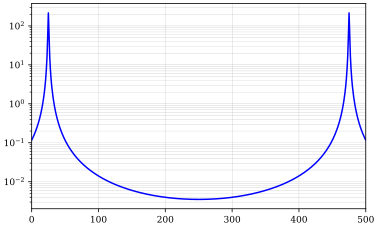

In [4]:
plt.semilogy(abs(sol["scan"]["E_arm"])**2);

In [5]:
sol["c0"].eigvectors

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

In [6]:
print(abs(sol["c0"].eigvalues))
print(np.angle(sol["c0"].eigvalues))

[0.99196774 0.99196774 0.99196774 0.99196774 0.99196774 0.99196774]
[ 2.22044605e-16 -8.63620612e-01 -8.63620612e-01 -1.72724122e+00
 -1.72724122e+00 -1.72724122e+00]


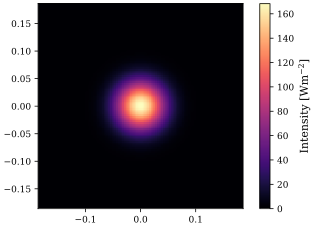

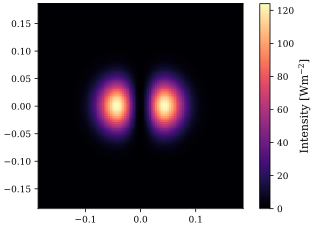

In [7]:
from finesse.plotting import plot_field

plot_field(
    model.homs,
    sol["c0"].eigvectors[:, 0],
    model.cavity.source.q
)
sol["c0"].plot_field(mode_idx=1)

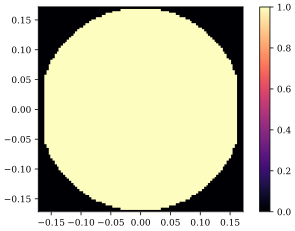

In [8]:
x = y = np.linspace(-0.17, 0.17, 100)
ligo_ap = circular_aperture(x, y, 0.17)
ligo_ap[:, abs(y) >= 0.163] = 0
model.m1.surface_map = Map(x, y, amplitude=ligo_ap)
model.m2.surface_map = Map(x, y, amplitude=ligo_ap)

# Plot the aperture we are applying.
plt.pcolormesh(x, y, ligo_ap, rasterized=True, shading="auto")
plt.gca().set_aspect("equal")
plt.colorbar();

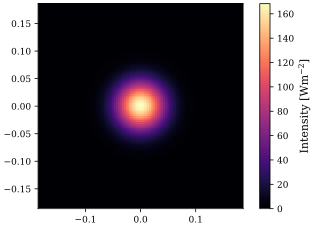

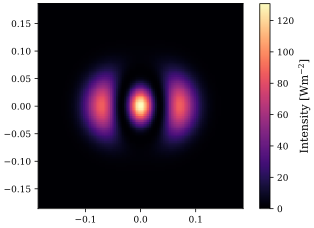

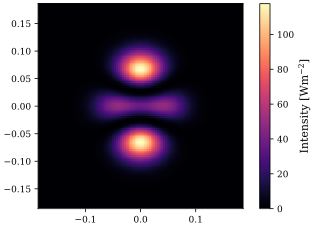

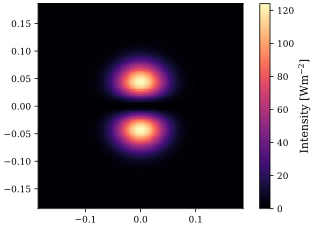

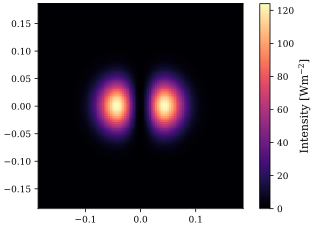

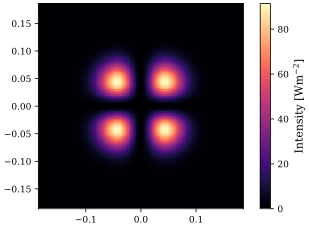

In [9]:
sol_aperture = model.run("eigenmodes(cavity, 0, name='c0')")

for i in range(len(model.homs)):
    plot_field(
        model.homs,
        sol_aperture.eigvectors[:, i],
        model.cavity.source.q
    )